# Override:
La palabra "overwrite" no su usa en Python (hasta donde yo se).
Se usa otra palabra "overload". En ambos casos, override, overload, se cambia la funcion. En override el "signature" es el mismo, en overload (sobrecarga) el "signature" cambia.
Mas tarde estudiamos "overload".  Este topico tambien forma parte del "polimorfismo" (veremos en la proxima clase). O sea que
"override" esta tanto dentro de herencia como dentro de polimorfismo.


El ejemplo que vamos  a ver a continuacion "override" el funcionamiento de un metodo de acuerdo al pais donde se ejecute.
Pensemos en la definicion de "adulto" de acuerdo al pais. En Colombia la edad necesaria para entrar a un night club es 18 anhos, en USA son 21. La mayoria de edad.

Veamos el ejemplo.

In [3]:
class Person:
    def __init__(self, name, age, inBar):
        self.name = name
        self.age = age
        self.inBar = inBar
        return

    def adult(self):
        return self.age >= 18  # en Colombia

    def fineBarOwner(self):
        if not self.adult():
            print("%s, you should not be here"%self.name)
            print("You and the bar owner are in trouble")
        else:
            print("%s, you are fine. You are a good guy"%self.name)

class Drinker(Person):
    def adult(self): # aca le hacemos un override
        return self.age >= 21  # en USA

    def fineBarOwner(self):
        super().fineBarOwner()
        return


jesus = Person("Jesus", 15, True)
print(jesus.__dict__)
jesus.fineBarOwner()

{'name': 'Jesus', 'age': 15, 'inBar': True}
Jesus, you should not be here
You and the bar owner are in trouble


In [5]:
rob = Person("Roberto", 18, True)
print(rob.__dict__)
rob.fineBarOwner()

{'name': 'Roberto', 'age': 18, 'inBar': True}
Roberto, you are fine. You are a good guy


In [6]:
robert = Drinker("Roberto", 18, True)
print(robert.__dict__)

{'name': 'Roberto', 'age': 18, 'inBar': True}


In [7]:
robert.fineBarOwner()

Roberto, you should not be here
You and the bar owner are in trouble


In [8]:
a=5
# overwrite
a=4

# Herencia multinivel

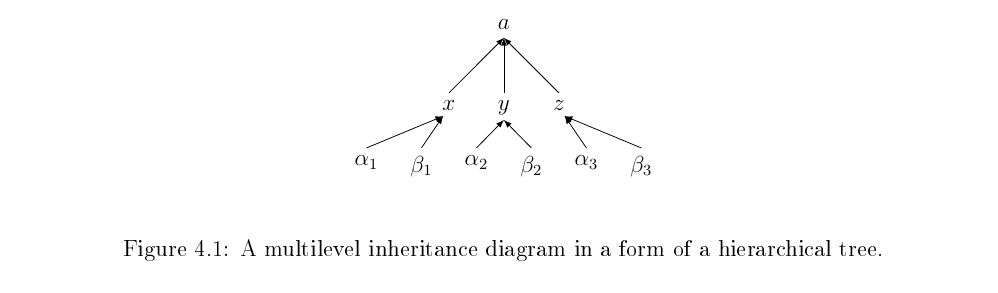

Haciendo una analogia con el algebra, piense en la expression

$$a [ x(\alpha_1 + \beta_1) + y (\alpha_2 + \beta_2) + z(\alpha_3 + \beta_3) ] = a x \alpha_1 + a x \beta_1 + a y \alpha_2 + a y \beta_2 + a z \alpha_3 + a z \beta_3.$$

# Herencia multiple (multiple inheritance)
Esto significa que un objeto puede heredar de dos o mas padres.
La estudiamos con un ejemplo
La herencia multiple no se aconseja en programacion (veremos un
ejemplo llamado el problema del diamante). De hecho
Java no implementa herencia multiple.



In [9]:
class Merchandise:

    def __init__(self, number, cost):
        self.number = number
        self.cost = cost
        return

    def computeTotalCost(self):
        total = self.number*self.cost
        return total

class Fruit:
    def __init__(self, name):
        self.name = name
        return

class Item(Merchandise, Fruit): # herencia multiple
    def __init__(self, name, number, cost):
        Fruit.__init__(self, name)
        Merchandise.__init__(self, number, cost)
        return


orange = Item("Orange", 300, 23.5)
orange.__dict__

{'name': 'Orange', 'number': 300, 'cost': 23.5}

In [10]:
orange.computeTotalCost()

7050.0

In [11]:
300*23.5

7050.0

## Problema del diamante.
Por el cual no se recomienda la herencia multiple.

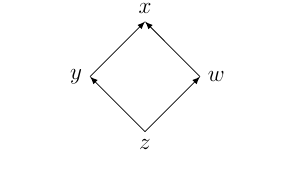

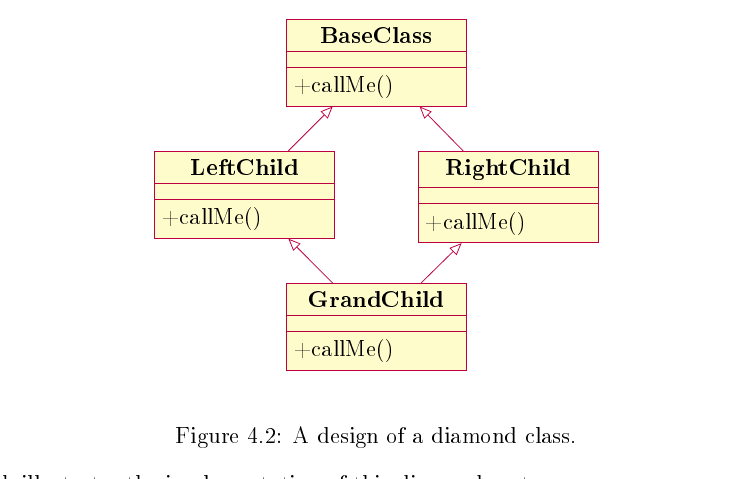

In [14]:
# implementamos la figura 4.2 en python
# base class
class BaseClass:
    countBase = 0  # to count calls
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class LeftChild(BaseClass):
    countLeft = 0  # to count calls
    def callMe(self):
        BaseClass.callMe(self)
        print("called from left child")
        self.countLeft += 1
        return

class RightChild(BaseClass):
    countRight = 0  # to count calls
    def callMe(self):
        BaseClass.callMe(self)
        print("called from right child")
        self.countRight += 1
        return

class GrandChild(LeftChild, RightChild):
    countGrand = 0  # to count calls
    def callMe(self):
        LeftChild.callMe(self)
        RightChild.callMe(self)
        print("called from grand child")
        self.countGrand += 1
        return

In [15]:
granC = GrandChild()
granC.callMe()

called from base class
called from left child
called from base class
called from right child
called from grand child


In [16]:
vars(granC)

{'countBase': 2, 'countLeft': 1, 'countRight': 1, 'countGrand': 1}

In [24]:
# implementamos la figura 4.2 en python
# base class, cambiar por super
class BaseClass:
    countBase = 0  # to count calls
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class LeftChild(BaseClass):
    countLeft = 0  # to count calls
    def callMe(self):
        super().callMe()
        print("called from left child")
        self.countLeft += 1
        return

class RightChild(BaseClass):
    countRight = 0  # to count calls
    def callMe(self):
        super().callMe()
        print("called from right child")
        self.countRight += 1
        return

class GrandChild(LeftChild, RightChild):
    countGrand = 0  # to count calls
    def callMe(self):
        super().callMe()
        print("called from grand child")
        self.countGrand += 1
        return

In [25]:
grandC = GrandChild()
grandC.callMe()

called from base class
called from right child
called from left child
called from grand child


In [26]:
vars(grandC)

{'countBase': 1, 'countRight': 1, 'countLeft': 1, 'countGrand': 1}

Para poder entender mejor lo que esta pasando vamos a simplicar la notacion, con A,B,C,D

In [31]:
# implementamos la figura 4.2 en python
# base class, cambiar por super
class A():
    def callMe(self):
        print("A")
        return

class B(A):
    def callMe(self):
        super().callMe()
        print("B")
        return

class C(A):
    def callMe(self):
        super().callMe()
        print("C")
        return

class D(B, C):
    def callMe(self):
        super().callMe()
        print("D")
        return

In [32]:
# vamos a ver un topico que se llama MRO: Method Resolution Order
myD = D()
myD.callMe()


A
C
B
D


In [33]:
help(D)

Help on class D in module __main__:

class D(B, C)
 |  Method resolution order:
 |      D
 |      B
 |      C
 |      A
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  callMe(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [34]:
# implementamos la figura 4.2 en python
# base class, cambiar por super
class A():
    def callMe(self):
        print("A")
        return

class B(A):
    def callMe(self):
        super().callMe()
        print("B")
        return

class C(A):
    def callMe(self):
        super().callMe()
        print("C")
        return

class D(C, B):
    def callMe(self):
        super().callMe()
        print("D")
        return

In [35]:
myD = D()
myD.callMe()

A
B
C
D


In [36]:
help(myD)

Help on D in module __main__ object:

class D(C, B)
 |  Method resolution order:
 |      D
 |      C
 |      B
 |      A
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  callMe(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

